# Costar data analysis & Multi-Family index prediction

## ML regression models

In [55]:
import sklearn
import sklearn.tree
import sklearn.datasets
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array
from statistics import median
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [44]:
df1 = df

In [46]:
# Convert category columns to dummy variables to get binary outcome
df1 = pd.get_dummies(df1, columns = ['Pop_cat'])

In [47]:
df1.columns

Index(['Market Sale Price Index', 'Median Household Income', 'Market Cap Rate',
       'Population', 'Existing Buildings', 'Gross Delivered Buildings',
       'Households', 'Rent Burden', 'National index', 'Industrial Employment',
       'Office Employment', 'Total Employment', 'Office_perc', 'Ind_perc',
       'Emp_perc', 'Emp__house_perc', 'Pop_cat_low_pop', 'Pop_cat_medium_pop',
       'Pop_cat_high_pop'],
      dtype='object')

In [48]:
# Spliting datas to 80:20
X = df1.drop(columns=['Market Sale Price Index'],axis=1)
y = pd.DataFrame(df1['Market Sale Price Index'])
# Test and Train the dataset
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
# Print out the shape of the train and test sets
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [49]:
# DCreate dataframe to store the results from multiple models
evaluation = pd.DataFrame(columns = ['Regressor','R2','MSE','MAE'])
evaluation

,Regressor,R2,MSE,MAE


In [155]:
#Develop function to perform Regression
def regressor(regressor_name, _regressor,_X,_y):
    X_train,X_test,y_train,y_test = train_test_split(_X,_y,test_size=0.2,random_state=1)
    print(f'Length of train data is {len(X_train)} and length of test data is {len(X_test)}')
    
    _regressor.fit(X_train, y_train.values.ravel())
    y_pred = _regressor.predict(X_test)
    
    #Calculate model performance
    R2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    

    #Evaluate the algorithm and print out the accuracy and errors
    print("R2:",R2)
    print("MSE:",MSE)
    print("MAE:",MAE)
    
    # Plot the regression to see the spreads of the overall data
    plt.scatter(y_test,y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.ylabel('Predicted Price')
    sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={'color':'blue'},line_kws={'color':'red'})
    plt.title(regressor_name)
    plt.show()
    
    # Add values into the evaluation table
    evaluation.loc[len(evaluation),:] = [regressor_name, R2, MSE, MAE]

In [57]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg


linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=1, max_depth=10)
random_forest = RandomForestRegressor(random_state=1, n_estimators=20, max_depth=10, criterion='squared_error')
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10)

Length of train data is 12480 and length of test data is 3120
R2: 0.8228651271916853
MSE: 376.0541472074328
MAE: 14.002338069322477


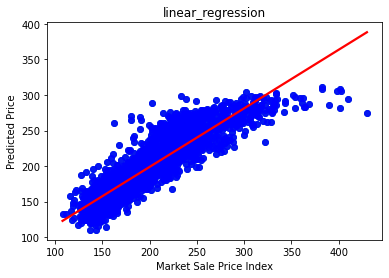

In [58]:
# Run Linear regression
regressor('linear_regression',linear_regression, X, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.890747295421778
MSE: 231.94152567986222
MAE: 10.22888019809744


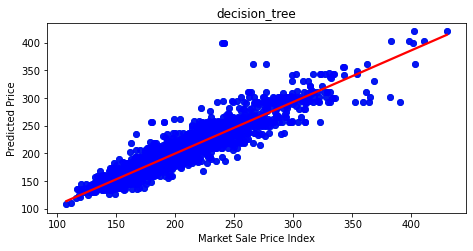

In [59]:
# Run Decision tree regression
regressor('decision_tree',decision_tree, X, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.9278689347155193
MSE: 153.13295350979445
MAE: 8.824423767547788


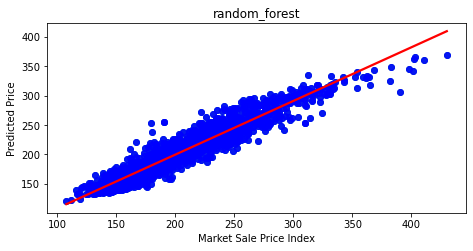

In [60]:
# Run random_forest regression
regressor('random_forest',random_forest, X, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.8941676261640836
MSE: 224.68022506709698
MAE: 10.443620232313107


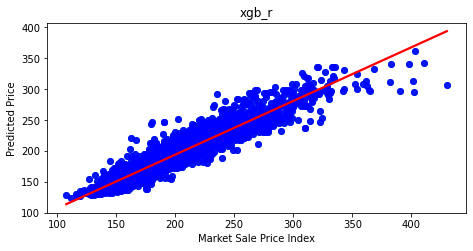

In [61]:
# Run XGBoost regression
regressor('xgb_r',xgb_r, X, y)

In [62]:
evaluation

,Regressor,R2,MSE,MAE
0,linear_regression,0.82287,376.05415,14.00234
1,decision_tree,0.89075,231.94153,10.22888
2,random_forest,0.92787,153.13295,8.82442
3,xgb_r,0.89417,224.68023,10.44362


# Feature selection using Lasso regression

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [64]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [65]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [69]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............model__alpha=0.1;, score=-392.554 total time=   0.1s
[CV 2/5] END ...............model__alpha=0.1;, score=-382.851 total time=   0.1s
[CV 3/5] END ...............model__alpha=0.1;, score=-378.342 total time=   0.1s
[CV 4/5] END ...............model__alpha=0.1;, score=-400.047 total time=   0.1s
[CV 5/5] END ...............model__alpha=0.1;, score=-381.835 total time=   0.1s
[CV 1/5] END ...............model__alpha=0.2;, score=-394.797 total time=   0.1s
[CV 2/5] END ...............model__alpha=0.2;, score=-387.244 total time=   0.1s
[CV 3/5] END ...............model__alpha=0.2;, score=-381.947 total time=   0.1s
[CV 4/5] END ...............model__alpha=0.2;, score=-401.953 total time=   0.1s
[CV 5/5] END ...............model__alpha=0.2;, score=-383.464 total time=   0.1s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-397.400 total time=   0.1s
[CV 2/5] END model__alpha=0.30000000000000004;

[CV 2/5] END ...............model__alpha=2.1;, score=-426.434 total time=   0.1s
[CV 3/5] END ...............model__alpha=2.1;, score=-416.124 total time=   0.1s
[CV 4/5] END ...............model__alpha=2.1;, score=-436.101 total time=   0.1s
[CV 5/5] END ...............model__alpha=2.1;, score=-416.026 total time=   0.1s
[CV 1/5] END ...............model__alpha=2.2;, score=-429.774 total time=   0.1s
[CV 2/5] END ...............model__alpha=2.2;, score=-428.020 total time=   0.1s
[CV 3/5] END ...............model__alpha=2.2;, score=-417.779 total time=   0.1s
[CV 4/5] END ...............model__alpha=2.2;, score=-437.974 total time=   0.1s
[CV 5/5] END ...............model__alpha=2.2;, score=-418.021 total time=   0.0s
[CV 1/5] END model__alpha=2.3000000000000003;, score=-430.688 total time=   0.1s
[CV 2/5] END model__alpha=2.3000000000000003;, score=-429.199 total time=   0.0s
[CV 3/5] END model__alpha=2.3000000000000003;, score=-419.520 total time=   0.0s
[CV 4/5] END model__alpha=2.

[CV 1/5] END ...............model__alpha=4.2;, score=-449.023 total time=   0.1s
[CV 2/5] END ...............model__alpha=4.2;, score=-449.942 total time=   0.1s
[CV 3/5] END ...............model__alpha=4.2;, score=-438.906 total time=   0.1s
[CV 4/5] END ...............model__alpha=4.2;, score=-463.069 total time=   0.1s
[CV 5/5] END ...............model__alpha=4.2;, score=-443.876 total time=   0.1s
[CV 1/5] END ...............model__alpha=4.3;, score=-450.071 total time=   0.1s
[CV 2/5] END ...............model__alpha=4.3;, score=-451.098 total time=   0.1s
[CV 3/5] END ...............model__alpha=4.3;, score=-440.000 total time=   0.1s
[CV 4/5] END ...............model__alpha=4.3;, score=-464.382 total time=   0.1s
[CV 5/5] END ...............model__alpha=4.3;, score=-445.197 total time=   0.1s
[CV 1/5] END model__alpha=4.3999999999999995;, score=-451.146 total time=   0.1s
[CV 2/5] END model__alpha=4.3999999999999995;, score=-452.282 total time=   0.1s
[CV 3/5] END model__alpha=4.

[CV 5/5] END ...............model__alpha=6.2;, score=-475.523 total time=   0.1s
[CV 1/5] END ...............model__alpha=6.3;, score=-476.906 total time=   0.1s
[CV 2/5] END ...............model__alpha=6.3;, score=-479.935 total time=   0.1s
[CV 3/5] END ...............model__alpha=6.3;, score=-467.963 total time=   0.1s
[CV 4/5] END ...............model__alpha=6.3;, score=-496.534 total time=   0.1s
[CV 5/5] END ...............model__alpha=6.3;, score=-477.394 total time=   0.1s
[CV 1/5] END ...............model__alpha=6.4;, score=-478.542 total time=   0.1s
[CV 2/5] END ...............model__alpha=6.4;, score=-481.662 total time=   0.1s
[CV 3/5] END ...............model__alpha=6.4;, score=-469.664 total time=   0.1s
[CV 4/5] END ...............model__alpha=6.4;, score=-498.437 total time=   0.1s
[CV 5/5] END ...............model__alpha=6.4;, score=-479.292 total time=   0.1s
[CV 1/5] END ...............model__alpha=6.5;, score=-480.206 total time=   0.1s
[CV 2/5] END ...............

[CV 4/5] END ...............model__alpha=8.3;, score=-539.926 total time=   0.1s
[CV 5/5] END ...............model__alpha=8.3;, score=-520.592 total time=   0.1s
[CV 1/5] END ...............model__alpha=8.4;, score=-517.144 total time=   0.1s
[CV 2/5] END ...............model__alpha=8.4;, score=-521.919 total time=   0.1s
[CV 3/5] END ...............model__alpha=8.4;, score=-509.763 total time=   0.1s
[CV 4/5] END ...............model__alpha=8.4;, score=-542.391 total time=   0.1s
[CV 5/5] END ...............model__alpha=8.4;, score=-523.040 total time=   0.1s
[CV 1/5] END ...............model__alpha=8.5;, score=-519.368 total time=   0.1s
[CV 2/5] END ...............model__alpha=8.5;, score=-524.217 total time=   0.1s
[CV 3/5] END ...............model__alpha=8.5;, score=-512.071 total time=   0.1s
[CV 4/5] END ...............model__alpha=8.5;, score=-544.884 total time=   0.1s
[CV 5/5] END ...............model__alpha=8.5;, score=-525.516 total time=   0.1s
[CV 1/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [70]:
search.best_params_

{'model__alpha': 0.1}

In [71]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [72]:
importance = np.abs(coefficients)
importance

array([ 0.35169193, 13.09510635,  7.38356612,  2.7647227 ,  3.83965378,
        0.        ,  3.13109716, 33.18231526,  4.18900462,  0.        ,
        0.        ,  2.47940144,  3.33829912,  0.34793271,  4.36759619,
        0.12693168,  0.        ,  0.37154174])

In [73]:
features = list(X.columns)

In [88]:
selected_features = np.array(features)[importance >2]
selected_features

array(['Market Cap Rate', 'Population', 'Existing Buildings',
       'Gross Delivered Buildings', 'Rent Burden', 'National index',
       'Industrial Employment', 'Office_perc', 'Ind_perc',
       'Emp__house_perc'], dtype='<U25')

In [89]:
X_select = X[selected_features]
X_select = X_select.drop(['Existing Buildings','Gross Delivered Buildings'], axis=1)
X_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Market Cap Rate        15600 non-null  float64
 1   Population             15600 non-null  int64  
 2   Rent Burden            15600 non-null  float64
 3   National index         15600 non-null  float64
 4   Industrial Employment  15600 non-null  int64  
 5   Office_perc            15600 non-null  float64
 6   Ind_perc               15600 non-null  float64
 7   Emp__house_perc        15600 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 975.1 KB


Length of train data is 12480 and length of test data is 3120
R2: 0.8187938940195754
MSE: 384.6973019648654
MAE: 14.126559066633646


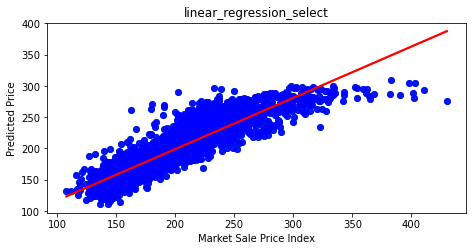

In [90]:
# Run Linear regression
regressor('linear_regression_select',linear_regression, X_select, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.885843884350863
MSE: 242.35137914037108
MAE: 10.689342641773392


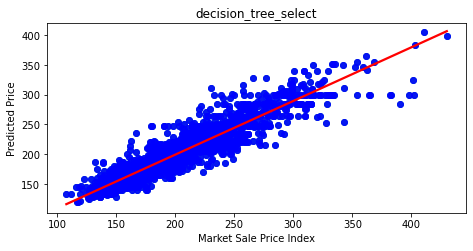

In [91]:
# Run Decision tree regression
regressor('decision_tree_select',decision_tree, X_select, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.9193672250852379
MSE: 171.18193005593415
MAE: 9.280487923578386


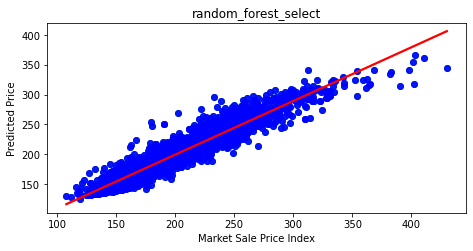

In [92]:
regressor('random_forest_select',random_forest, X_select, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.8861275920866976
MSE: 241.74907272287163
MAE: 10.911986100612543


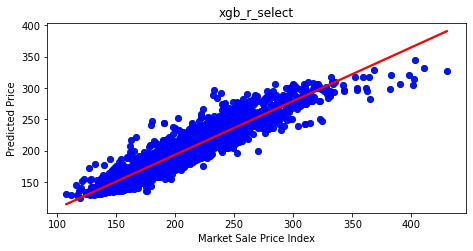

In [93]:
regressor('xgb_r_select',xgb_r, X_select, y)

### Select top important features based on Random Forest model

In [99]:
# Fit the model
rf = random_forest.fit(X,y)

# Extract scores of features
rf_feature_importance = rf.feature_importances_

# Assign feature name and importance scores in the model
rf_feature_importance_dict = {}
for i, feature in enumerate(X.columns):
    rf_feature_importance_dict[feature] = round(rf_feature_importance[i],3)

# Build data frame for the importance feature
rf_feature_importance_df = pd.DataFrame(list(rf_feature_importance_dict.items()), columns=['feature','importance'])
rf_feature_importance_df = rf_feature_importance_df.sort_values('importance',ascending=False).reset_index()
rf_feature_importance_df.drop('index',axis=1,inplace=True)
rf_feature_importance_df

/var/folders/nt/t986r85d7czdtzssh_w8182c0000gn/T/ipykernel_1686/2387348775.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,feature,importance
0,National index,0.75400
1,Market Cap Rate,0.14100
2,Emp__house_perc,0.01500
3,Ind_perc,0.01500
4,Median Household Income,0.01100
5,Existing Buildings,0.01000
6,Rent Burden,0.01000
7,Office_perc,0.00900
8,Emp_perc,0.00700
9,Industrial Employment,0.00700


<AxesSubplot:ylabel='feature'>

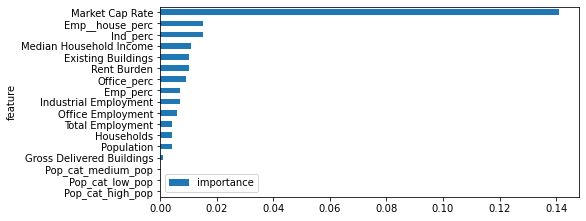

In [103]:
# Visualize the important feature
rf_feature_importance_df[rf_feature_importance_df['feature'] != 'National index'].\
sort_values('importance').plot.barh(x='feature')

In [126]:
selected_features = list(rf_feature_importance_df[rf_feature_importance_df.importance>0.003]['feature'])
selected_features.remove('Existing Buildings')
selected_features

['National index',
 'Market Cap Rate',
 'Emp__house_perc',
 'Ind_perc',
 'Median Household Income',
 'Rent Burden',
 'Office_perc',
 'Emp_perc',
 'Industrial Employment',
 'Office Employment',
 'Total Employment',
 'Households',
 'Population']

In [127]:
X_select_df = X[selected_features]
X_select_df.head()

,National index,Market Cap Rate,Emp__house_perc,Ind_perc,Median Household Income,Rent Burden,Office_perc,Emp_perc,Industrial Employment,Office Employment,Total Employment,Households,Population
0,167.89500,0.08000,1.05884,0.12458,43598,0.17500,0.13536,0.39316,8261,8976,66310,62625,168660
1,170.84700,0.08000,1.06400,0.12603,43931,0.17700,0.13873,0.39591,8420,9269,66812,62793,168757
2,174.84300,0.08000,1.05903,0.12534,44249,0.17600,0.13801,0.39489,8358,9203,66684,62967,168867
3,179.58500,0.08000,1.06795,0.12679,44149,0.17600,0.13624,0.39659,8507,9141,67097,62828,169184
4,178.10500,0.08000,1.07080,0.12682,44065,0.17700,0.13499,0.39604,8514,9062,67133,62694,169510


Length of train data is 12480 and length of test data is 3120
R2: 0.8197467671077854
MSE: 382.6743695467442
MAE: 14.109230159836862


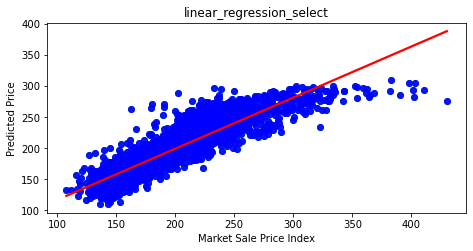

In [120]:
regressor('linear_regression_select',linear_regression, X_select_df, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.890738834988291
MSE: 231.9594870278991
MAE: 10.238766085969997


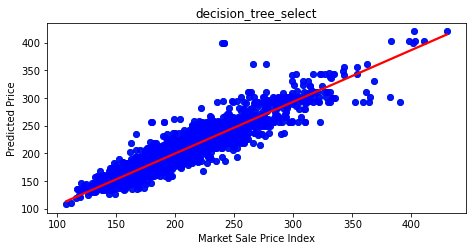

In [121]:
regressor('decision_tree_select',decision_tree, X_select_df, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.9259050237074087
MSE: 157.30230123696705
MAE: 8.888593705653689


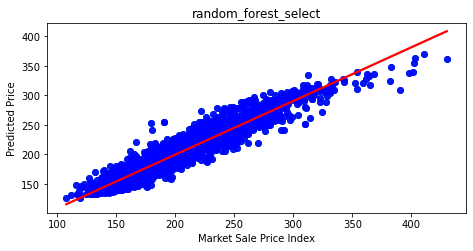

In [128]:
regressor('random_forest_select',random_forest, X_select_df, y)

Length of train data is 12480 and length of test data is 3120
R2: 0.8945589629184293
MSE: 223.84942418021774
MAE: 10.439472876328688


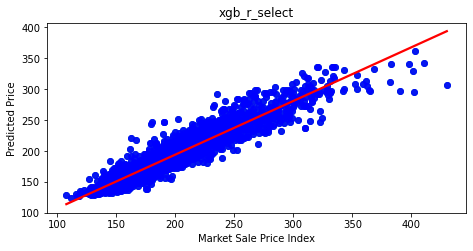

In [123]:
regressor('xgb_r_select',xgb_r, X_select_df, y)

In [124]:
evaluation.sort_values('R2',ascending=False)

,Regressor,R2,MSE,MAE
2,random_forest,0.92787,153.13295,8.82442
19,random_forest_select,0.92778,153.31932,8.82775
6,random_forest_select,0.92484,159.55654,9.09444
11,random_forest_select,0.91937,171.18193,9.28049
15,random_forest_select,0.91394,182.70927,9.55132
8,random_forest_select,0.91232,186.13303,9.55833
5,decision_tree_select,0.89801,216.51952,10.23447
20,xgb_r_select,0.89456,223.84942,10.43947
3,xgb_r,0.89417,224.68023,10.44362
7,xgb_r_select,0.89262,227.97279,10.57531


### Conclusion 
The best model to explain the multi-family houses prices index is Random Forest regressor. It provides the best accuracy at 92.787%. The most important variables are the following:</br>
['National index',</br>
 'Market Cap Rate',</br>
 'Emp__house_perc',</br>
 'Ind_perc',</br>
 'Median Household Income',</br>
 'Rent Burden',</br>
 'Office_perc',</br>
 'Emp_perc',</br>
 'Industrial Employment',</br>
 'Office Employment',</br>
 'Total Employment',</br>
 'Households',</br>
 'Population']
 <p> This may look like a good model, explainig the 92.78% of the error. However, it's easy to notic, the model predicts the index worse with for higher values. The core reasons behind this are: training data is skewed for lower values, ML models usually provides poor accuracy for the values outside the training ranges. So, as far as we are going to predict the future index, which is unarguably is higher, than every values we used to train the model, we come us with time-series forecasting.
 